---
format:
  html:
    code-fold: true
execute:
  warning: false
---

# Initial EDA

## Import

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [14]:
with open("../data/data.csv", "r") as f:
    df = pd.read_csv(f)
df.head()

,Level,Category,Variable,County,Date,GEOID,State FIPS,State,Value,Denominator,Denominator Description,Row-ID,Latitude,Longitude,Location,Year
0,County,Airports,Total Airports,"Grant County, Wisconsin",01/01/2020 12:00:00 AM,55043,55,Wisconsin,9.0,9.0,Total Airports,airports-2020-55043,42.867479,-90.706205,POINT (-90.706205 42.867479),2020
1,County,Airports,Total Airports,"Taylor County, Florida",01/01/2020 12:00:00 AM,12123,12,Florida,7.0,7.0,Total Airports,airports-2020-12123,30.047015,-83.603520,POINT (-83.60352 30.047015),2020
2,County,Airports,Total Airports,"Stephens County, Texas",01/01/2020 12:00:00 AM,48429,48,Texas,2.0,2.0,Total Airports,airports-2020-48429,32.735872,-98.836184,POINT (-98.836184 32.735872),2020
3,County,Airports,Other airports,"Knox County, Maine",01/01/2020 12:00:00 AM,23013,23,Maine,7.0,9.0,Total Airports,other-airports-2020-23013,44.155975,-69.234045,POINT (-69.234045 44.155975),2020
4,County,Airports,Primary Airports,"Colfax County, New Mexico",01/01/2020 12:00:00 AM,35007,35,New Mexico,0.0,5.0,Total Airports,primary-airports-2020-35007,36.606139,-104.646840,POINT (-104.64684 36.606139),2020


## Groupings

1. "Category"

In [7]:
cats = list(df["Category"].unique())
print(cats)

['Airports', 'Bridges', 'Business', 'Commuting', 'Demographics', 'Maritime', 'Person trips', 'Railroad']


In [8]:
catVars = {}
for cat in cats:
    if cat not in catVars:
        catVars[cat] = []
    
    for var in df[df["Category"] == cat]["Variable"].unique():
        catVars[cat].append(var)
    
print(json.dumps(catVars, indent = 4))

{
    "Airports": [
        "Total Airports",
        "Other airports",
        "Primary Airports",
        "Commercial-service Airports",
        "Civil use and seaplane bases"
    ],
    "Bridges": [
        "Bridges, poor",
        "Bridges, fair",
        "Total bridges",
        "Bridges, good",
        "Bridge area (square meters)",
        "Bridge area, poor (square meters)",
        "Bridge area, fair (square meters)",
        "Bridge area, good (square meters)"
    ],
    "Business": [
        "Establishments",
        "Employees"
    ],
    "Commuting": [
        "Workers",
        "Commute by car/ truck/van",
        "Work at home",
        "Work in-state",
        "Work out-of-state",
        "Commute by public transportation",
        "Workers wo/ a vehicle"
    ],
    "Demographics": [
        "Population",
        "Hispanic",
        "Median Household Income",
        "Non Hispanic White Alone"
    ],
    "Maritime": [
        "Marinas",
        "Docks"
    ],
    "Perso

In [9]:
len(df["Variable"].unique())

41

# Dates

In [10]:
sorted(list(df["Year"].unique()))

[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

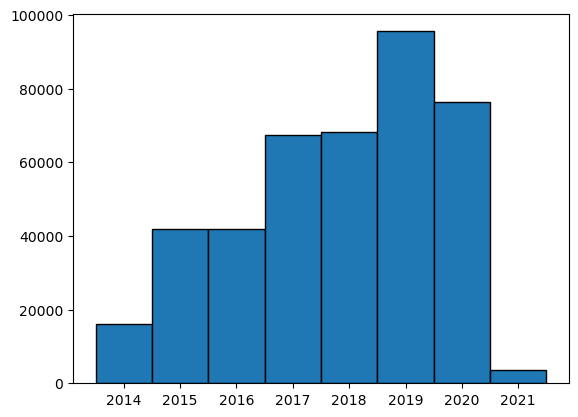

In [11]:
bins = [i + 0.5 for i in range(2013, 2022)]
labs = [str(i) for i in range(2013, 2022)]

plt.hist(df["Year"], bins = bins, edgecolor = "black")
plt.show()

# Locations

In [12]:
states = sorted(list(df["State"].unique()))
len(states)

56

In [13]:
counties = sorted(list(df["County"].unique()))
len(counties)

3233